# Mask R-CNN Training (Demo) - DEEPCADD


This notebook shows how to train Mask R-CNN on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)


## **1. Installation**

Load your dataset

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/armbrustsamuel/deepcadd.git
import sys
sys.path.append("/content/deepcadd/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 3.9 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'deepcadd'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 87 (delta 44), reused 64 (delta 24), pack-reused 0
Unpacking objects: 100% (87/87), done.
Checking out files: 100% (22/22), done.
VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!pip install Ipython --upgrade
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 792 kB 4.2 MB/s 
     |████████████████████████████████| 374 kB 63.9 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: Ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.0 which is incompatible.


In [ ]:
# !nvidia-smi

## **2. Image Dataset**

Load your annotated dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive' )

Mounted at /content/drive


In [ ]:
# Extract Images
# images_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/dataset.zip"
images_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/debora/dataset.zip"

# annotated by me
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/coco-annotation.json"
# annotated by Debora
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/coco-debora-annotation.json"
annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/debora/coco-debora-annotation.json"
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/debora/coco-debora-annotation-2.json"


# annotated but isolating not processed data
# images_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/82images-rcnn/dataset.zip"
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/82images-rcnn/coco-debora-annotation.json"

# images_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/dataset-separation/narrowing/dataset.zip"
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/dataset-separation/narrowing/coco-annotation-narrow.json"

# images_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/dataset-separation/grayscale/dataset.zip"
# annotations_path = "/content/drive/MyDrive/Colab Notebooks/RCNN/dataset-separation/grayscale/coco-annotation-grayscale.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 264 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Colab Notebooks/RCNN/debora/coco-debora-annotation.json
Annotation json path:  /content/drive/MyDrive/Colab Notebooks/RCNN/debora/coco-debora-annotation.json
Train: 118
Validation: 14
Classes: 1


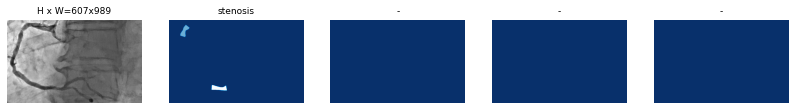

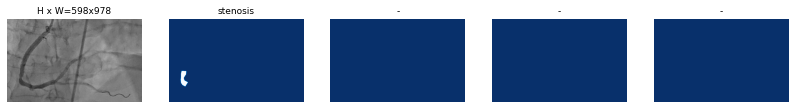

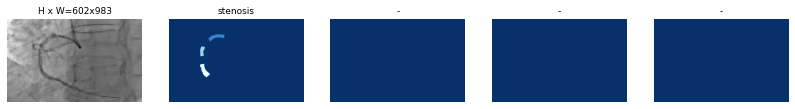

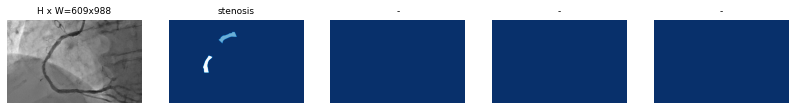

In [ ]:
# Load image samples
display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
%cd "deepcadd"
!git pull origin main
%cd ..

/content/deepcadd
From https://github.com/armbrustsamuel/deepcadd
 * branch            main       -> FETCH_HEAD
Already up to date.
/content


In [ ]:
# Load Configuration
config = CustomConfig(class_number)

config.CAD_KERNEL = True
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
INFO: CAD_KERNEL is True
INFO: Using custom CAD weights


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/deepcadd/logs/object20211227T2151/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4

In [ ]:
# Custom training hyperparameters
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=7,
            layers='heads')

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/deepcadd/logs/object20211227T2151/mask_rcnn_object_0005.h5
Re-starting from epoch 5


## **4. Detection (test your model on a random image)**

original_image           shape: (512, 512, 3)         min:    0.00000  max:  246.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  246.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  142.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


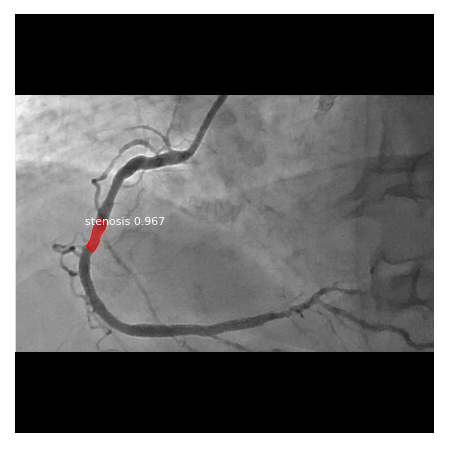

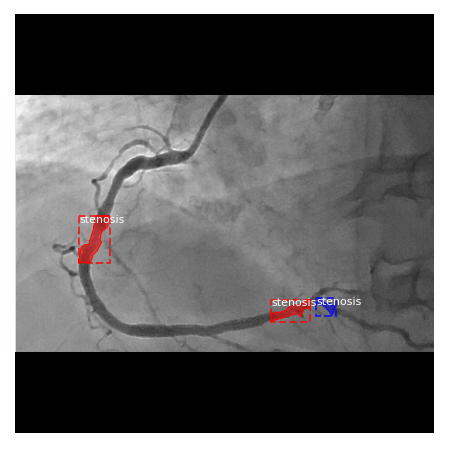

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

## Testing the model


In [ ]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

dir_root = "/content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/imagens"
# dir_root = "/content/drive/MyDrive/Colab Notebooks/RCNN/91imagens-wo-stenosis"

def print_default(filename, print_box=True):
  img = cv2.imread(filename)

  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Detect results
  r = test_model.detect([image])[0]
  if print_box == True:
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=True)
  else:
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False)


def print_image(filename):
  img = cv2.imread(filename)

  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Detect results
  r = test_model.detect([image])[0]

  # Get Coordinates and show it on the image
  object_count = len(r["class_ids"])
  if object_count != 0:
    colors = random_colors(object_count)
  else:
    print("No stenosis found for img at: " + filename)
    return
  for i in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, i]
      contours = get_mask_contours(mask)
      for cnt in contours:
          cv2.polylines(img, [cnt], True, colors[i], 2)
          img = draw_mask(img, [cnt], colors[i])

  cv2_imshow(img)

In [ ]:
for filename in os.listdir(dir_root):
    if filename.endswith("png"): 
      # Your code comes here such as 
      print(filename)
      print_image(dir_root+"/"+filename)
      # print_default(dir_root+"/"+filename)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load Image
# img = cv2.imread("/content/img-12.png") 
img_filename = "/content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/imagens/img-104.png"

print_image(img_filename)

No stenosis found for img at: /content/drive/MyDrive/Colab Notebooks/RCNN/122images-rcnn/imagens/img-104.png


## Evaluation

In [ ]:
from os import listdir
from xml.etree import ElementTree
from numpy import zeros
from numpy import asarray
from numpy import expand_dims
from numpy import mean
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.utils import Dataset
from mrcnn.utils import compute_ap, compute_recall
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
# from train_mask_rcnn_pro import *

def model_evaluation_custom(dataset_val, test_model, inference_config):
    APs = list(); 
    ARs = list();
    F1_scores = list();  
    print("Testing the model on {} validation images.".format(len(dataset_val.image_ids)))
    for image_id in dataset_val.image_ids:
        # Load image and ground truth data
        image, image_meta, gt_class_id, gt_bbox, gt_mask = \
            modellib.load_image_gt(dataset_val, inference_config,
                                   image_id, use_mini_mask=False)
        molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
        # Run object detection
        results = test_model.detect([image], verbose=0)
        r = results[0]
        # Compute AP
        AP, precisions, recalls, overlaps = \
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                             r["rois"], r["class_ids"], r["scores"], r['masks'])
        AR, positive_ids = compute_recall(r["rois"], gt_bbox, iou=0.2)
        ARs.append(AR)
        F1_scores.append((2* (mean(precisions) * mean(recalls)))/(mean(precisions) + mean(recalls)))
        APs.append(AP)
    mAP = mean(APs)
    mAR = mean(ARs)
    return mAP, mAR, F1_scores

mAP, mAR, F1_score = model_evaluation_custom(dataset_val, test_model, inference_config)
print("mAP: %.3f" % mAP)
print("mAR: %.3f" % mAR)

F1_score_2 = (2 * mAP * mAR)/(mAP + mAR)
print('f1-score: ', F1_score_2)


Testing the model on 14 validation images.
mAP: 0.156
mAR: 0.554
f1-score:  0.24386581965284007


### Additional - can be hidden


In [ ]:
# source: https://github.com/matterport/Mask_RCNN/issues/2165



def evaluate_model(dataset, model, cfg):
  APs = list(); 
  ARs = list();
  F1_scores = list(); 
  for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
    scaled_image = mold_image(image, cfg)
    sample = expand_dims(scaled_image, 0)
    yhat = model.detect(sample, verbose=0)
    r = yhat[0]
    AP, precisions, recalls, overlaps = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r['masks'])
    AR, positive_ids = compute_recall(r["rois"], gt_bbox, iou=0.2)
    ARs.append(AR)
    F1_scores.append((2* (mean(precisions) * mean(recalls)))/(mean(precisions) + mean(recalls)))
    APs.append(AP)
  mAP = mean(APs)
  mAR = mean(ARs)
  return mAP, mAR, F1_scores

mAP, mAR, F1_score = evaluate_model(dataset_val, test_model, inference_config)
print("mAP: %.3f" % mAP)
print("mAR: %.3f" % mAR)
print("first way calculate f1-score: ", F1_score)

F1_score_2 = (2 * mAP * mAR)/(mAP + mAR)
print('second way calculate f1-score_2: ', F1_score_2)


mAP: 0.000
mAR: 0.143
first way calculate f1-score:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
second way calculate f1-score_2:  0.0
